In [105]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [106]:
df=pd.read_csv('D:\ML for Project\LoanPredictionAI\loan_approval_dataset.csv')

In [107]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [108]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [110]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [111]:
for i in df.columns:
  dis = len(df[i].unique())
  print(f"{i} - {dis}")

loan_id - 4269
 no_of_dependents - 6
 education - 2
 self_employed - 2
 income_annum - 98
 loan_amount - 378
 loan_term - 10
 cibil_score - 601
 residential_assets_value - 278
 commercial_assets_value - 188
 luxury_assets_value - 379
 bank_asset_value - 146
 loan_status - 2


In [112]:
for c in df.columns:
    print("---- %s ---" % c)
    print(df[c].value_counts())

---- loan_id ---
loan_id
1       1
2852    1
2838    1
2839    1
2840    1
       ..
1430    1
1431    1
1432    1
1433    1
4269    1
Name: count, Length: 4269, dtype: int64
----  no_of_dependents ---
 no_of_dependents
4    752
3    727
0    712
2    708
1    697
5    673
Name: count, dtype: int64
----  education ---
 education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64
----  self_employed ---
 self_employed
Yes    2150
No     2119
Name: count, dtype: int64
----  income_annum ---
 income_annum
7000000    62
4100000    59
7600000    57
4700000    56
6900000    55
           ..
3600000    33
3400000    33
9300000    33
8500000    32
6700000    30
Name: count, Length: 98, dtype: int64
----  loan_amount ---
 loan_amount
10600000    27
20000000    24
9400000     24
16800000    23
23900000    23
            ..
35800000     1
38500000     1
39500000     1
38800000     1
36100000     1
Name: count, Length: 378, dtype: int64
----  loan_term ---
 loan_term
6     490
12 

# **ENCODING CATEGORICAL DATA**

In [113]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [114]:
from sklearn.preprocessing import OrdinalEncoder
rank=[' Rejected',' Approved']
oe = OrdinalEncoder(categories=[rank])
df[' loan_status'] = oe.fit_transform(df[[' loan_status']])
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1.0
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0.0
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0.0
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0.0
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0.0


In [115]:
rank=[' Not Graduate',' Graduate']
oe = OrdinalEncoder(categories=[rank])
df[' education'] = oe.fit_transform(df[[' education']])
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1.0,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1.0
1,2,0,0.0,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0.0
2,3,3,1.0,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0.0
3,4,3,1.0,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0.0
4,5,5,0.0,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0.0


In [116]:
oe = OrdinalEncoder()
df[' self_employed'] = oe.fit_transform(df[[' self_employed']])

In [117]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1.0,0.0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1.0
1,2,0,0.0,1.0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0.0
2,3,3,1.0,0.0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0.0
3,4,3,1.0,0.0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0.0
4,5,5,0.0,1.0,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0.0


# **EDA**

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

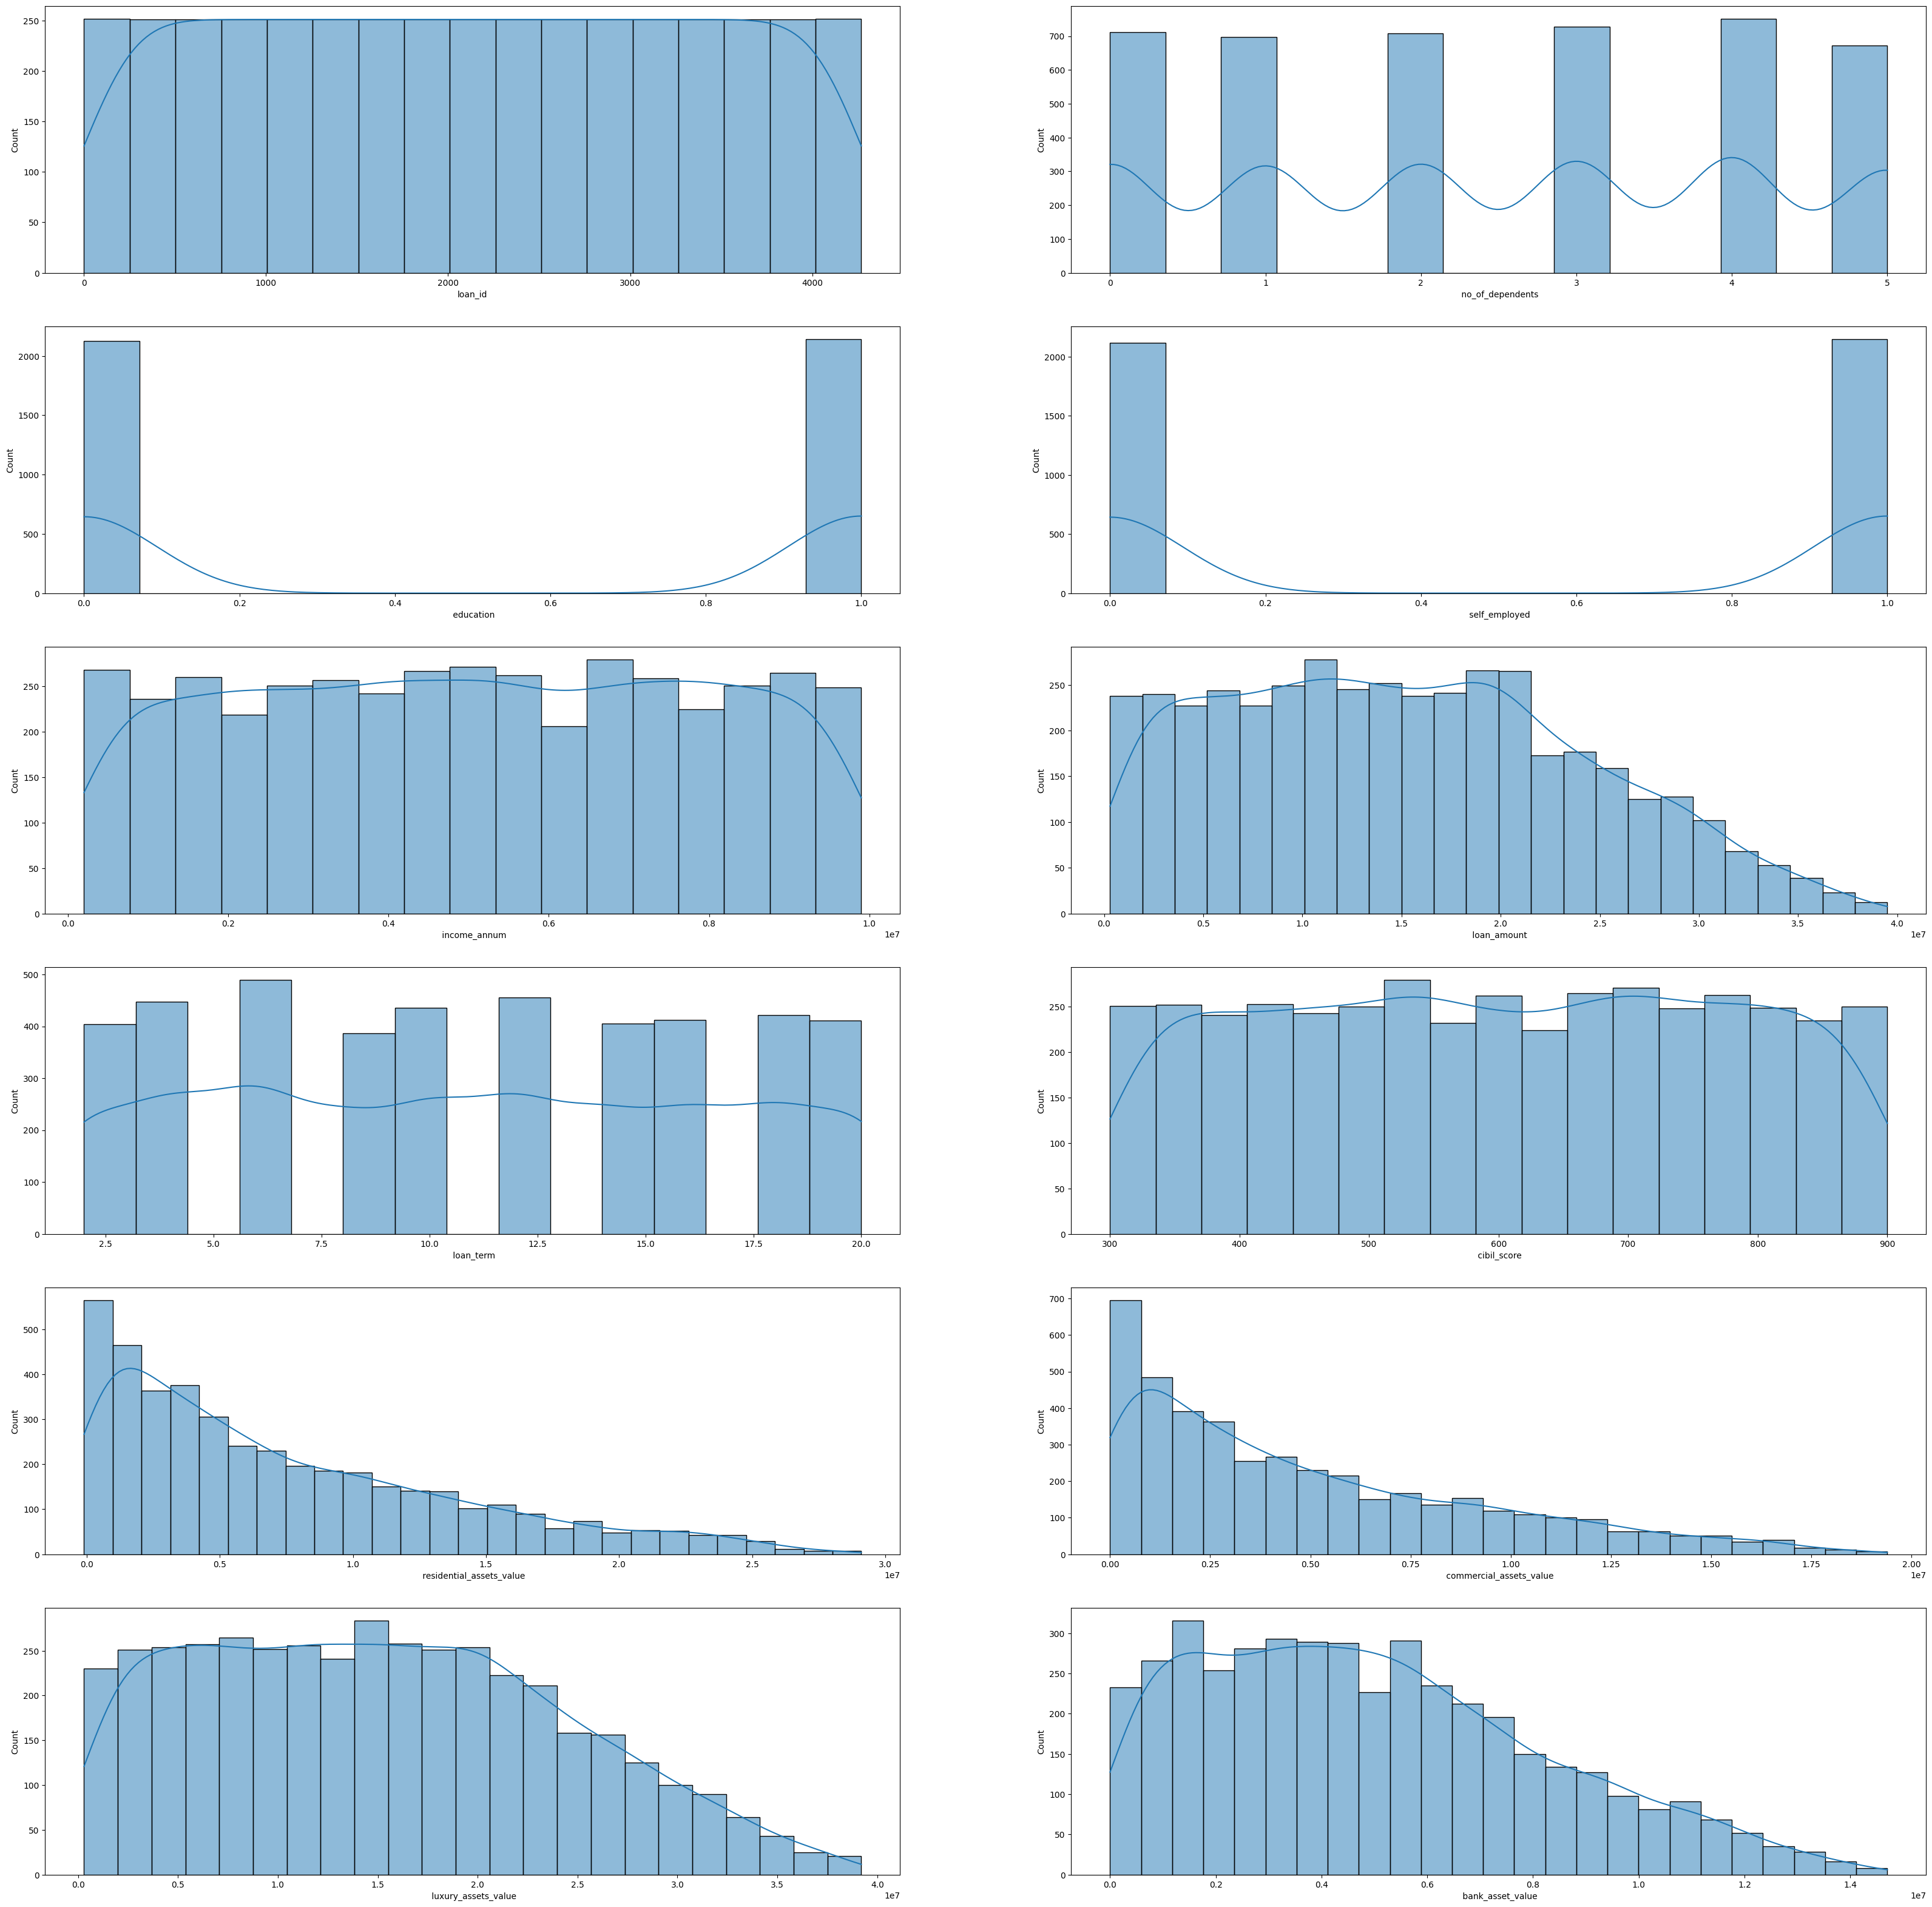

In [119]:
fig, axes = plt.subplots(nrows = 6, ncols = 2)    
axes = axes.flatten()         
fig.set_size_inches(40,40)

for ax, col in zip(axes, df.columns):
  sns.histplot(df[col], kde=True, ax=ax)

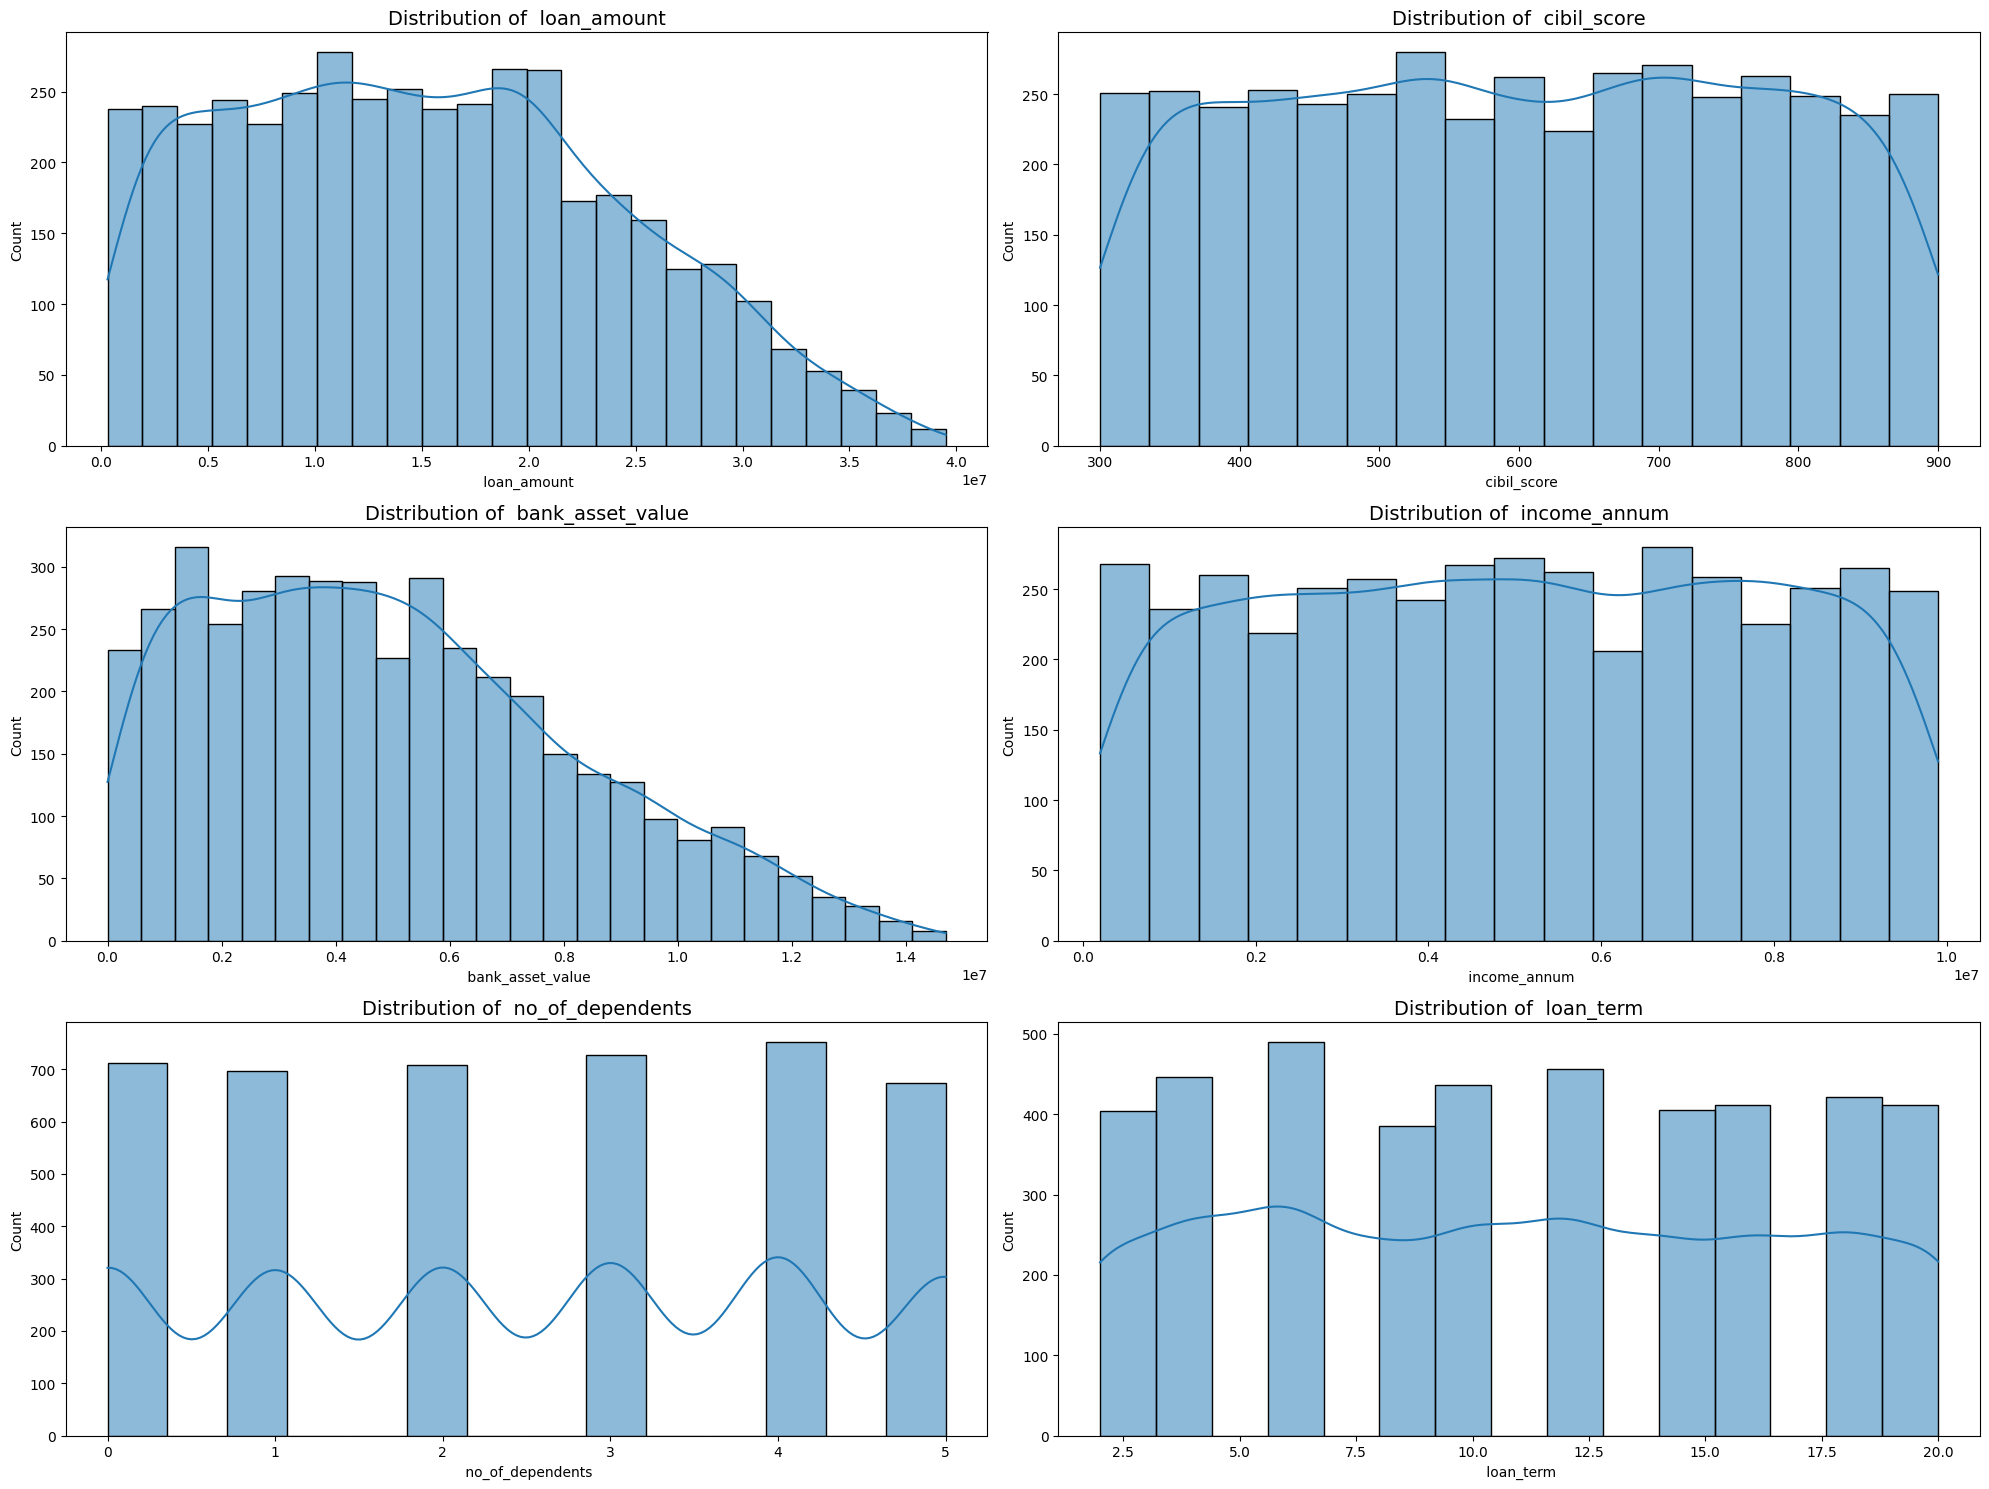

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the most relevant columns to visualize
selected_columns = [
    ' loan_amount',  
    ' cibil_score',  
    ' bank_asset_value',  
    ' income_annum',  
    ' no_of_dependents',  
    ' loan_term'
]

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))  # 3 rows, 2 columns
axes = axes.flatten()  # Flatten the array of axes for easy iteration

# Plot only selected columns
for ax, col in zip(axes, selected_columns):
    sns.histplot(df[col], kde=True, ax=ax)  # Use histplot (newer version of distplot)
    ax.set_title(f'Distribution of {col}', fontsize=14)  # Add a title

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


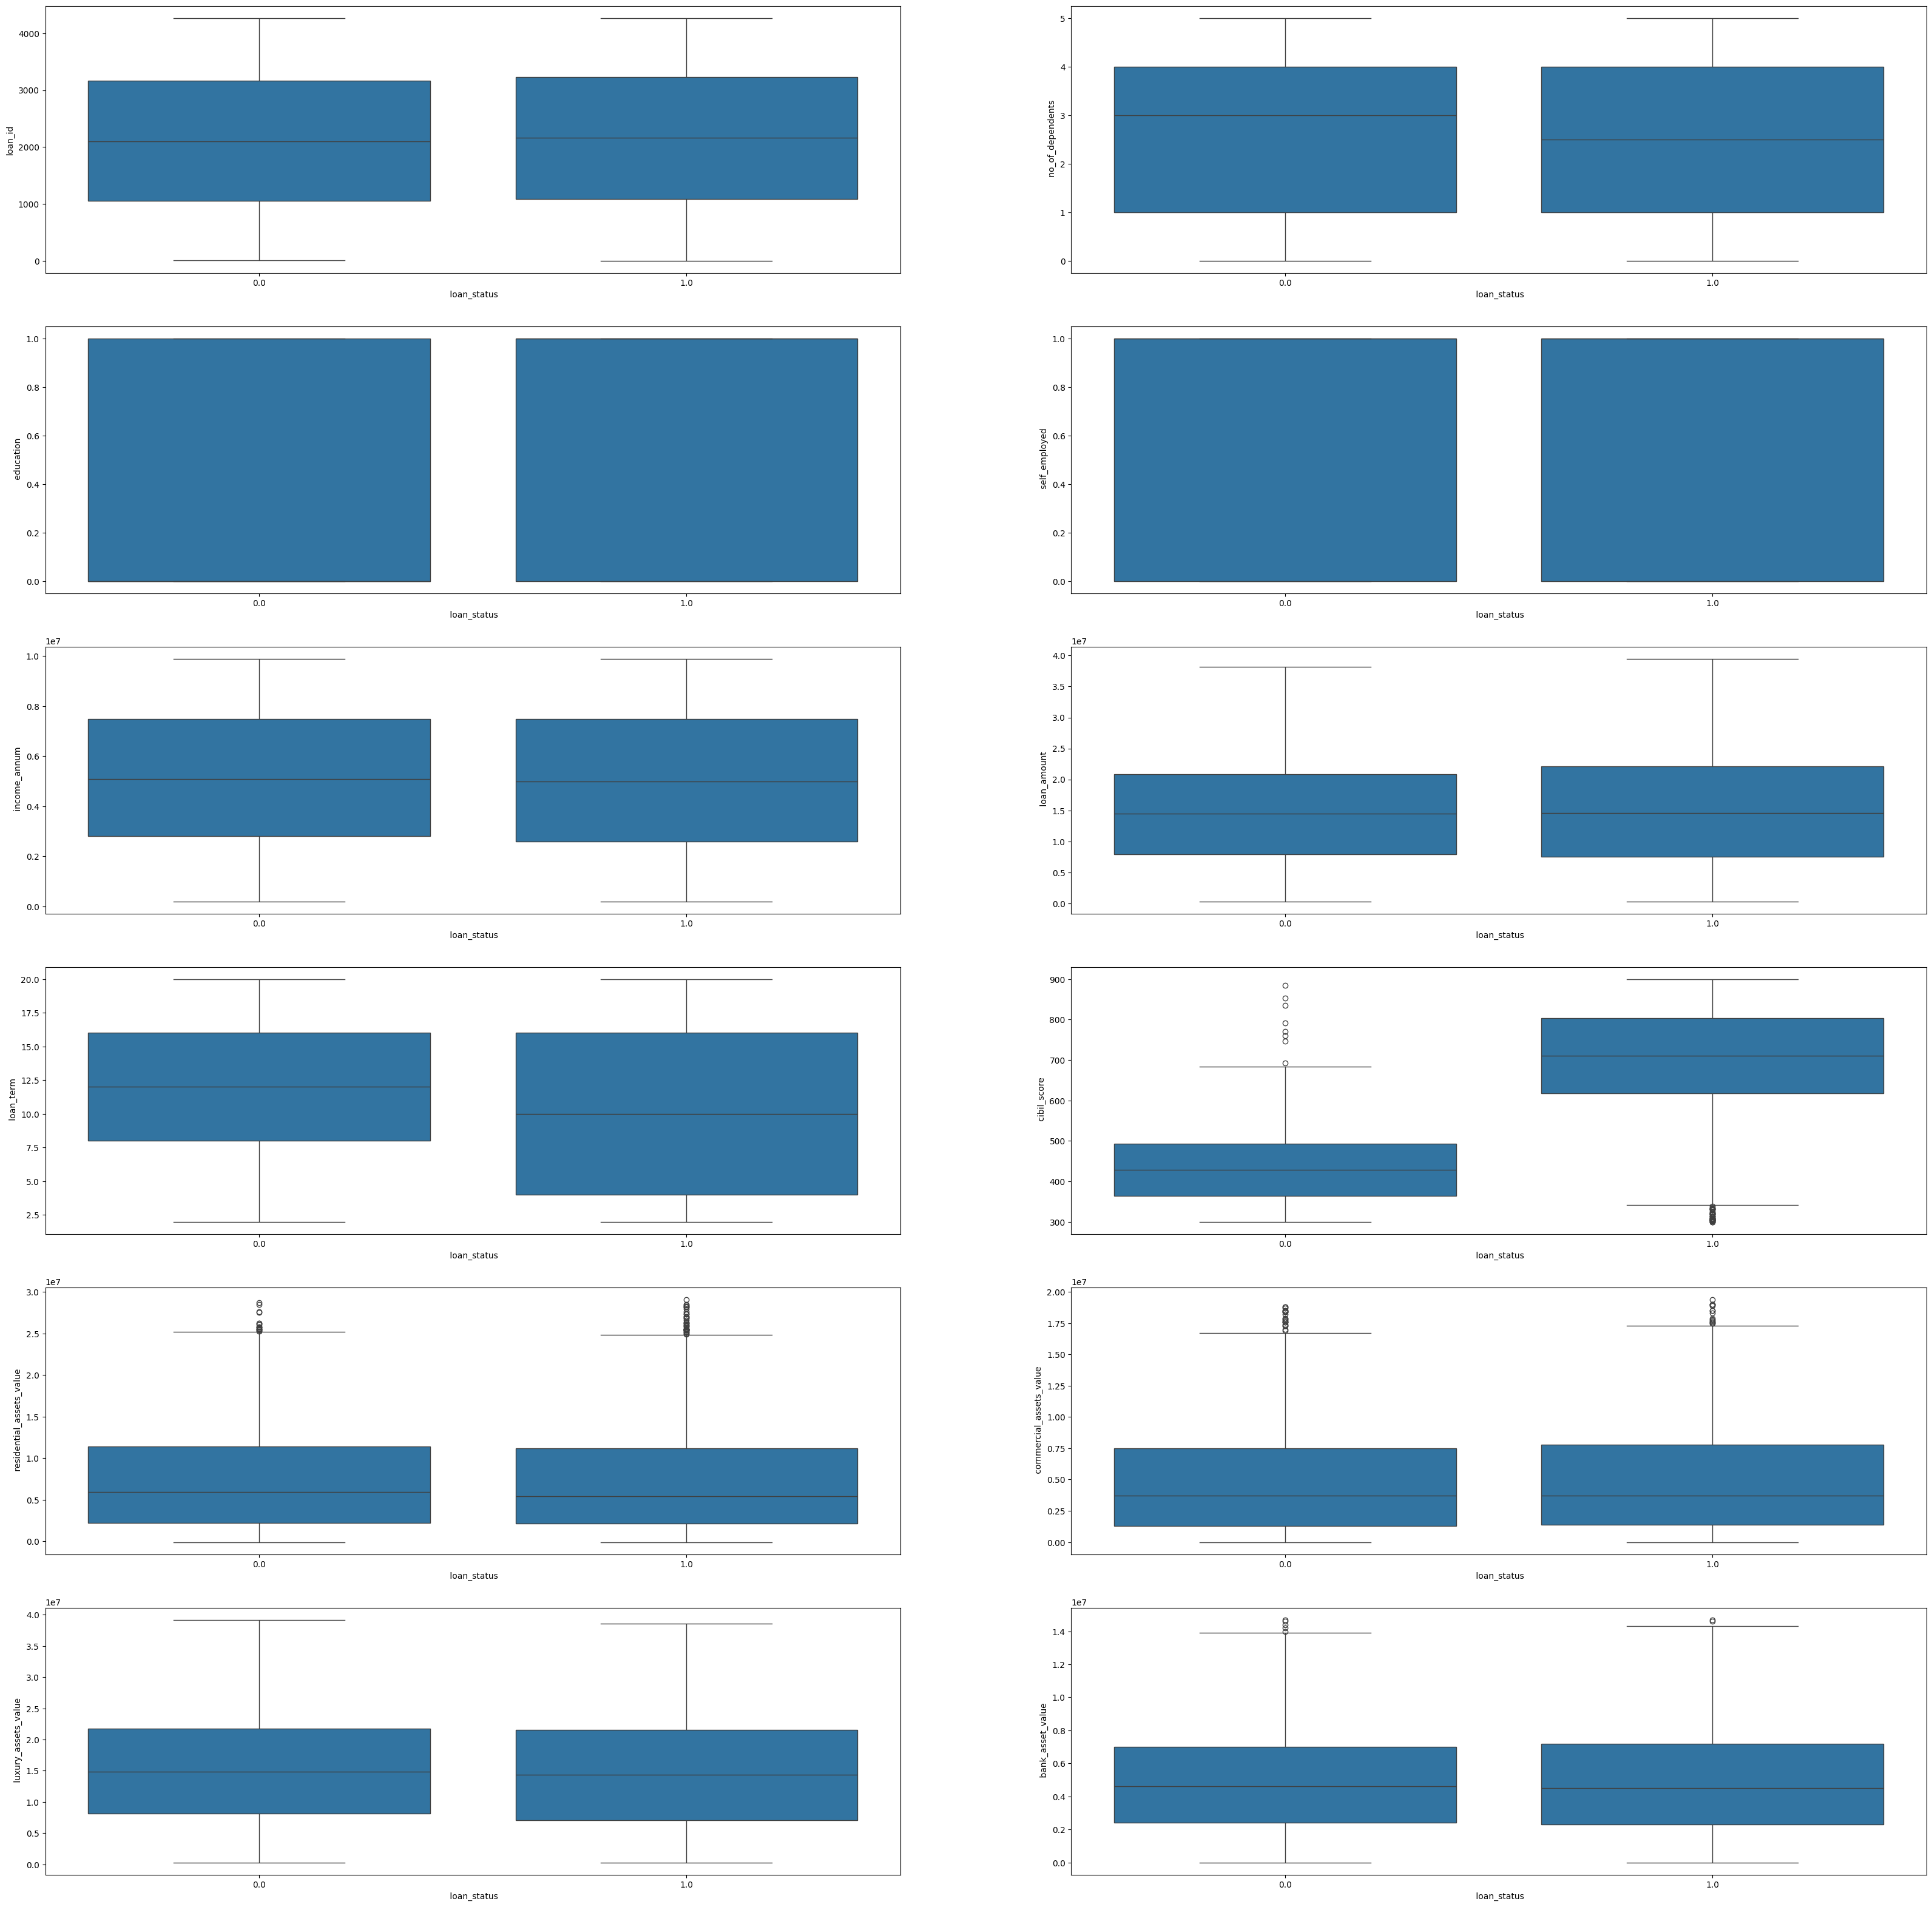

In [121]:
fig, axes = plt.subplots(nrows = 6, ncols = 2)    
axes = axes.flatten()         
fig.set_size_inches(40,40)

for ax, col in zip(axes, df.columns):
  sns.boxplot(x=' loan_status',y=df[col], ax = ax , data=df)

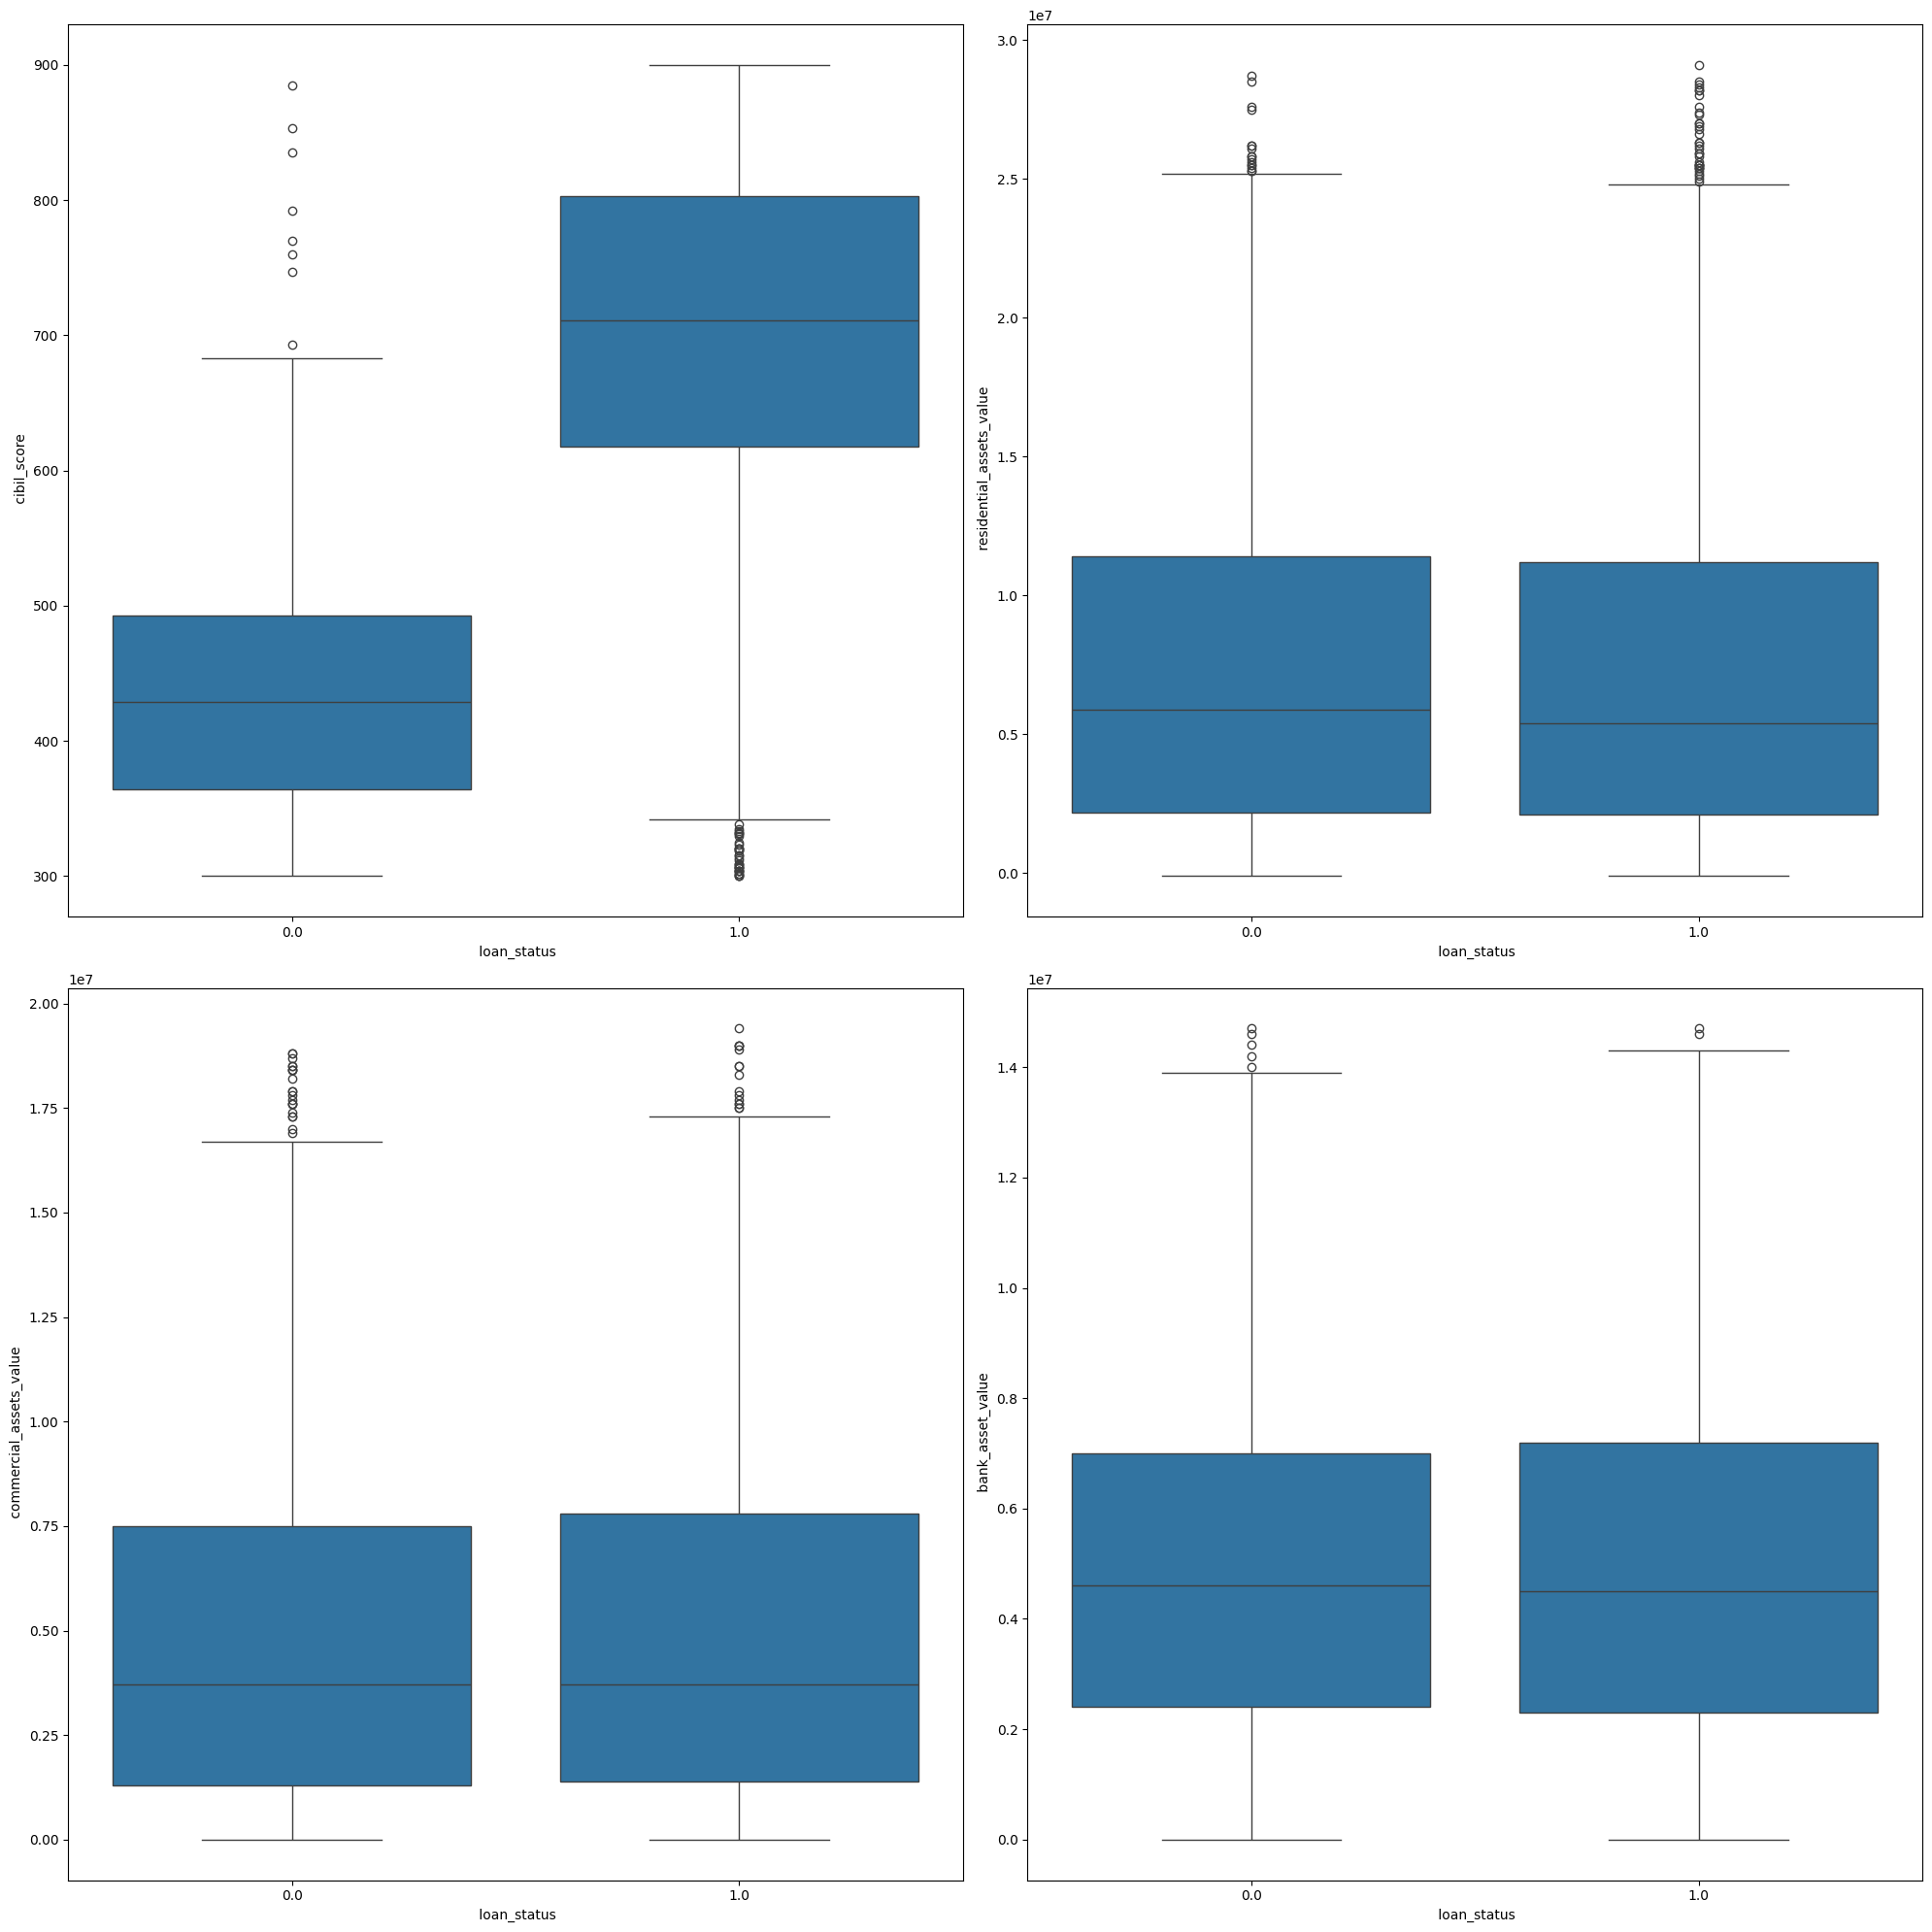

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant columns (adjust based on your data)
important_columns = [' cibil_score',
       ' residential_assets_value', ' commercial_assets_value', ' bank_asset_value']

# Create subplots with an appropriate number of rows and columns
fig, axes = plt.subplots(nrows=len(important_columns)//2, ncols=2)    
axes = axes.flatten()         
fig.set_size_inches(20, 20)  # Adjust size for better readability

# Loop over the selected important columns
for ax, col in zip(axes, important_columns):
    sns.boxplot(x=' loan_status', y=df[col], ax=ax, data=df)

plt.tight_layout()  # Adjust layout for better spacing between plots
plt.show()

In [123]:
df.drop(['loan_id'],axis=1,inplace=True)

<Axes: >

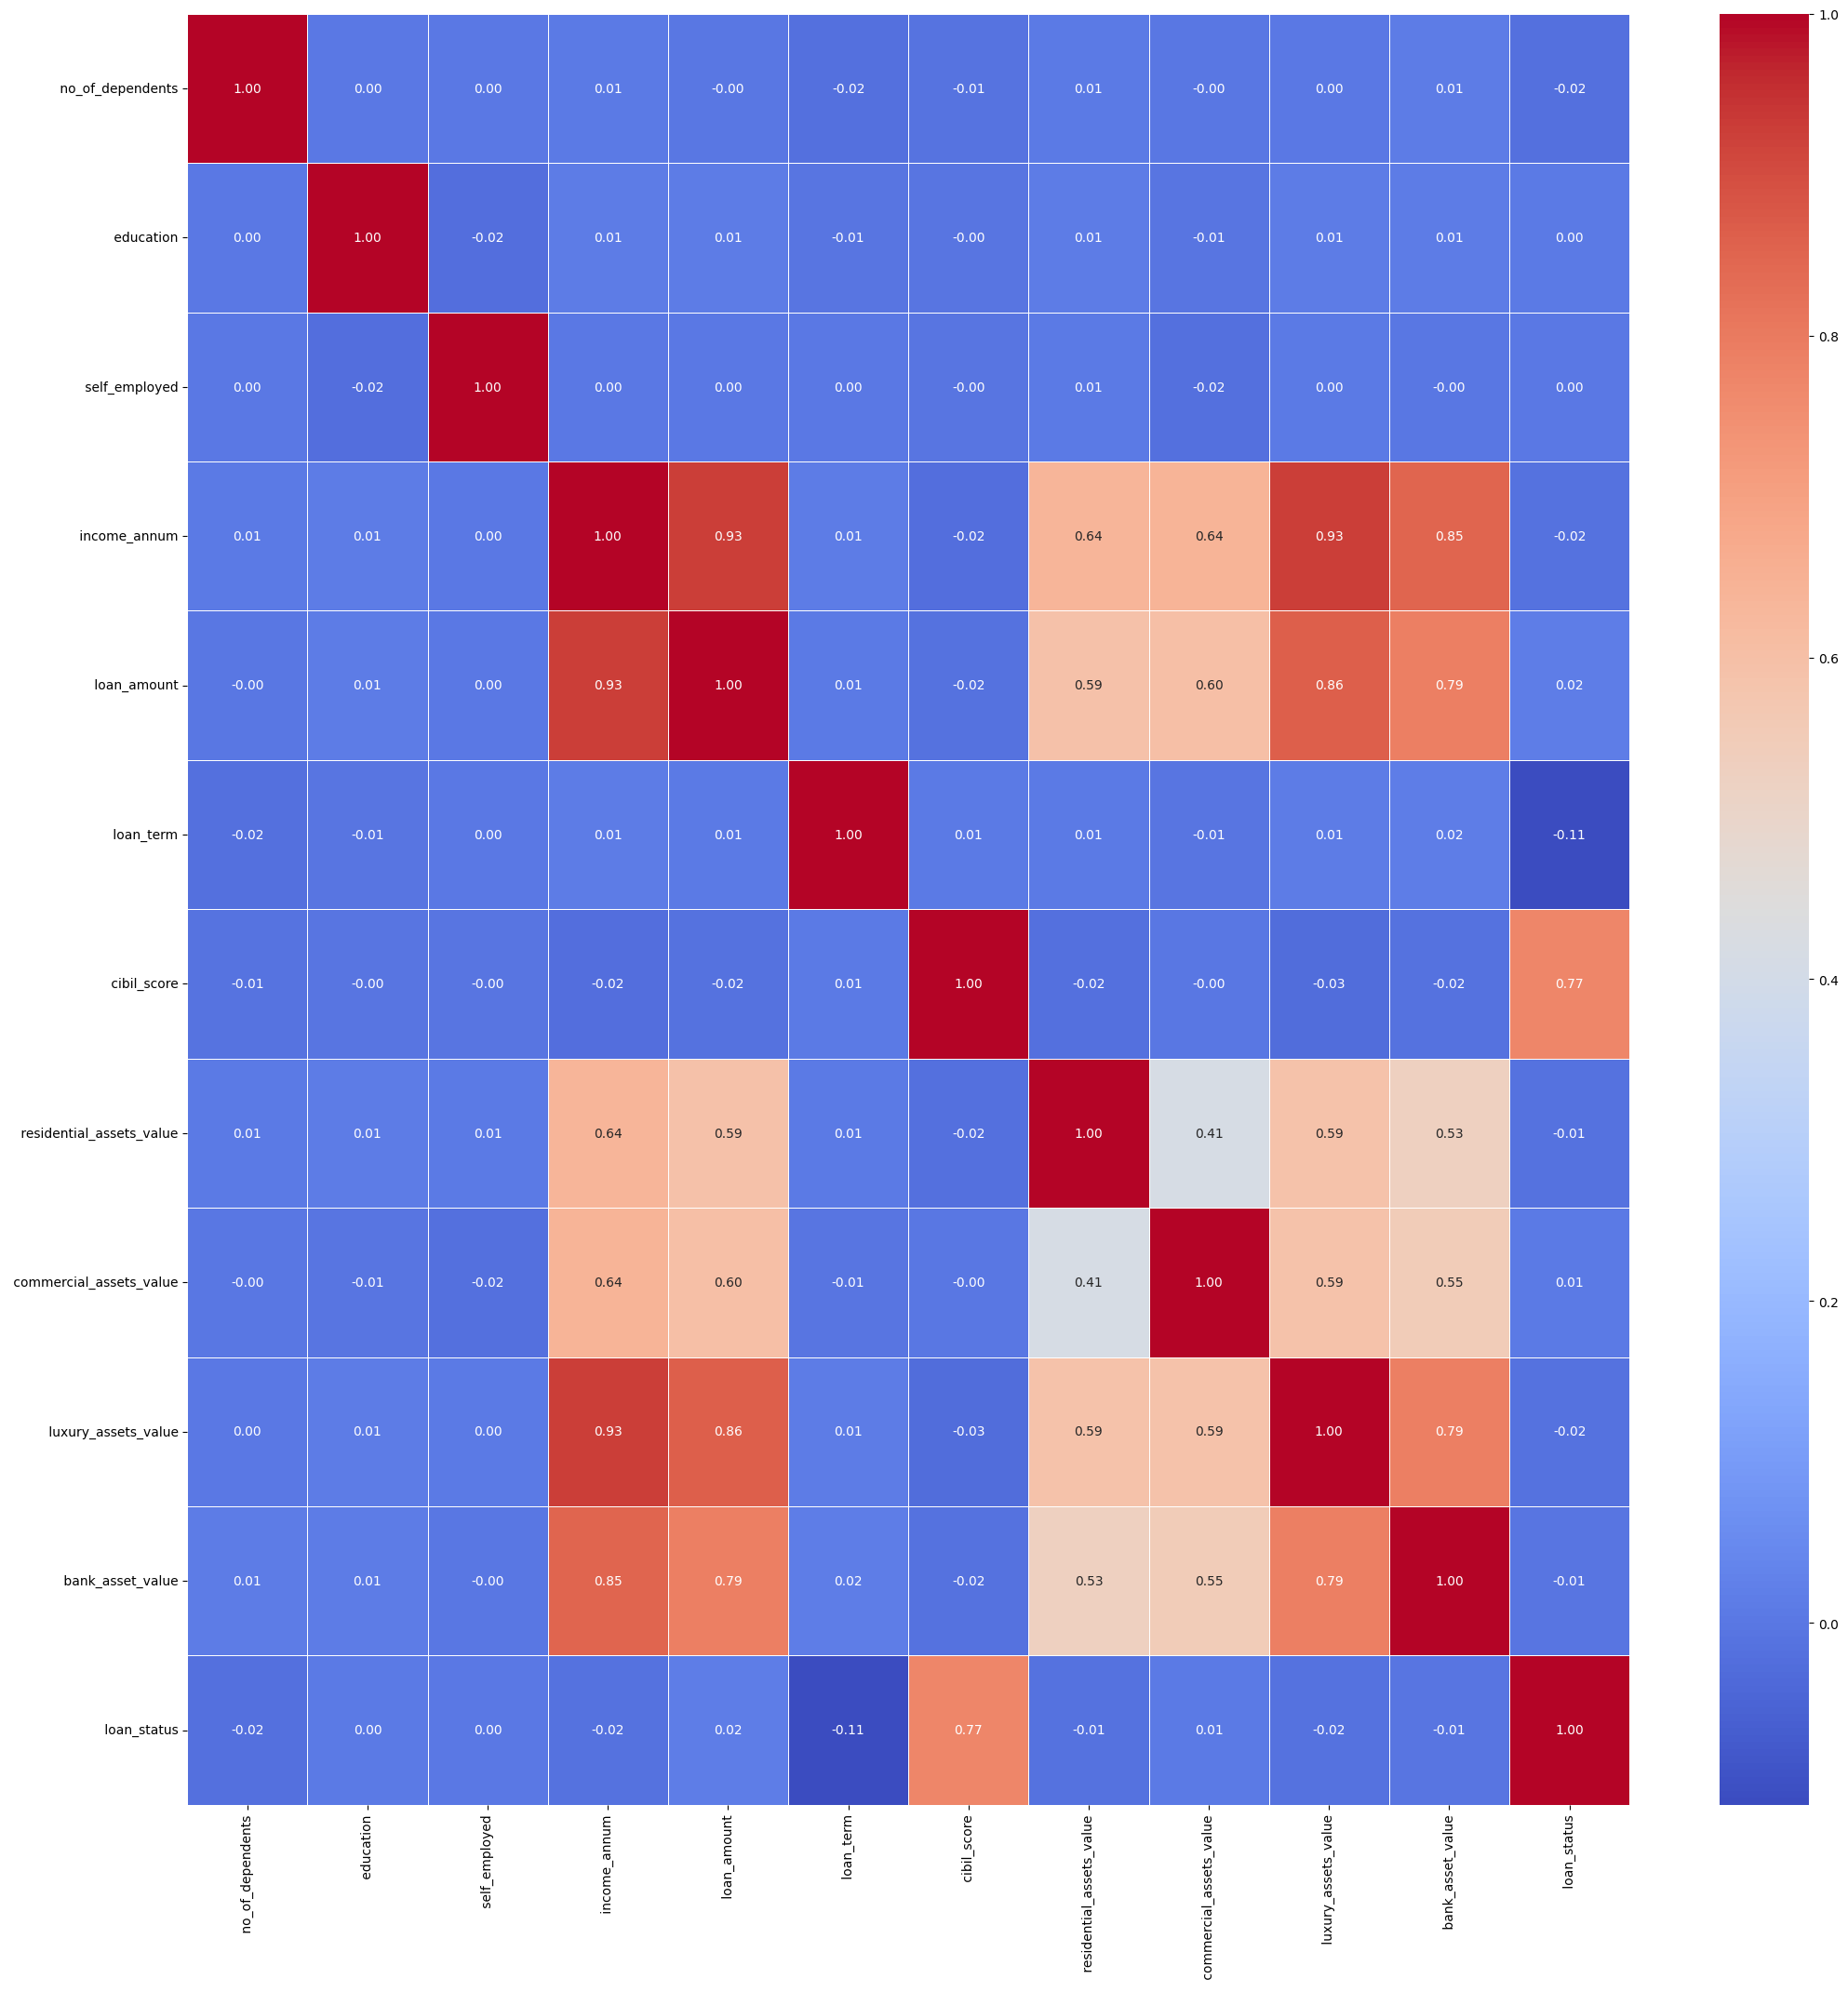

In [124]:
correlation_matrix = df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

<Axes: xlabel=' cibil_score', ylabel=' loan_term'>

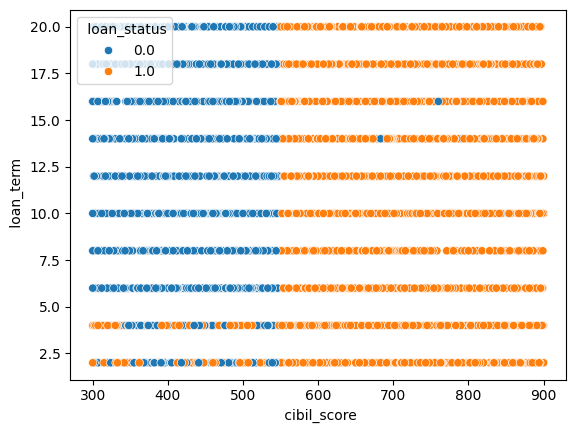

In [125]:
sns.scatterplot(x=' cibil_score', y=' loan_term', hue=' loan_status', data=df)

# **TRAIN TEST SPLIT, FEATURE SCALING, PCA AND OVERSAMPLING DATA**

In [126]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
X=df.drop([' loan_status'],axis=1)
y=df[' loan_status']
X.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value'],
      dtype='object')

 loan_status
1.0    0.62216
0.0    0.37784
Name: proportion, dtype: float64


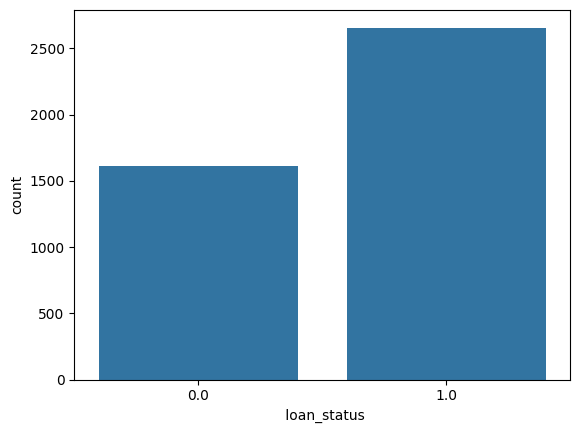

In [127]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Count target variable distribution
print(df[' loan_status'].value_counts(normalize=True))  # Check imbalance

# Visualize distribution
sns.countplot(x=df[' loan_status'])
plt.show()


In [128]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Drop non-feature columns (loan_id is just an identifier)
X = df.drop(columns=[' loan_status'])  # Features
y = df[' loan_status']  # Target variable

# Convert categorical variables using One-Hot Encoding
X = pd.get_dummies(X, columns=[' education', ' self_employed'], drop_first=True)

# Save original feature names after encoding
feature_names = X.columns.tolist()

# Feature Scaling (Normalize numeric values)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Fit and transform the entire dataset before splitting

# Apply PCA to reduce dimensionality while keeping 95% variance
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_pca = pca.fit_transform(X_scaled)

# Retrieve the new feature names (Principal Components)
pca_feature_names = [f"PC{i+1}" for i in range(pca.n_components_)]

# Create a DataFrame for the transformed dataset
X_pca_df = pd.DataFrame(X_pca, columns=pca_feature_names)
y_df = pd.DataFrame(y, columns=[' loan_status'])
processed_dataset = pd.concat([X_pca_df, y_df], axis=1)

# Save processed dataset before splitting
processed_dataset.to_csv("processed_dataset.csv", index=False)

# Split dataset before applying SMOTE (to avoid data leakage)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, stratify=y, random_state=42)

# Apply SMOTE only on training set
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Convert resampled training set to DataFrame
X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=pca_feature_names)
y_train_resampled_df = pd.DataFrame(y_train_resampled, columns=[' loan_status'])
resampled_train_dataset = pd.concat([X_train_resampled_df, y_train_resampled_df], axis=1)

# Save the resampled training dataset
resampled_train_dataset.to_csv("resampled_train_dataset.csv", index=False)

# Check output
print("X_train_resampled shape:", X_train_resampled.shape)
print("X_test shape:", X_test.shape)
print("y_train_resampled shape:", y_train_resampled.shape)
print("First 10 labels in y_train_resampled:", y_train_resampled[:10])
print("Processed and resampled datasets saved successfully.")


X_train_resampled shape: (4250, 8)
X_test shape: (854, 8)
y_train_resampled shape: (4250,)
First 10 labels in y_train_resampled: 0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    0.0
6    1.0
7    1.0
8    0.0
9    0.0
Name:  loan_status, dtype: float64
Processed and resampled datasets saved successfully.


In [129]:
# Get feature names from original dataset (after one-hot encoding)
feature_names = X.columns  

# Create a DataFrame showing how each original feature contributes to each principal component
pca_components = pd.DataFrame(pca.components_, columns=feature_names)

# Display top contributing features for each principal component
print("Principal Component Contribution:")
print(pca_components.T)  # Transpose to make it easier to read


Principal Component Contribution:
                                 0         1         2         3         4  \
no_of_dependents          0.002782 -0.470290  0.434975  0.312060  0.699479   
income_annum              0.459348  0.001217  0.002108  0.001753  0.000735   
loan_amount               0.440529  0.006406 -0.004543  0.003901 -0.009366   
loan_term                 0.006374  0.551209 -0.262741 -0.372899  0.696459   
cibil_score              -0.012921  0.290899 -0.384893  0.821795  0.047491   
residential_assets_value  0.336610 -0.003880  0.013047 -0.009289  0.004190   
commercial_assets_value   0.340153 -0.000952 -0.018038  0.045692 -0.025085   
luxury_assets_value       0.439564  0.002138  0.003693 -0.008200 -0.001631   
bank_asset_value          0.415278  0.004547 -0.001295  0.005954  0.013674   
education_1.0             0.005964 -0.497813 -0.456726 -0.283607  0.026146   
self_employed_1.0        -0.000150  0.377454  0.620070 -0.074095 -0.147683   

                             

In [130]:
# Find top 5 contributing features for each principal component
top_features_per_pc = pca_components.apply(lambda x: x.abs().nlargest(5).index.tolist(), axis=1)

print("Top 5 contributing features per principal component:")
print(top_features_per_pc)


Top 5 contributing features per principal component:
0    [ income_annum,  loan_amount,  luxury_assets_v...
1    [ loan_term,  education_1.0,  no_of_dependents...
2    [ self_employed_1.0,  education_1.0,  no_of_de...
3    [ cibil_score,  loan_term,  no_of_dependents, ...
4    [ no_of_dependents,  loan_term,  self_employed...
5    [ education_1.0,  self_employed_1.0,  cibil_sc...
6    [ residential_assets_value,  commercial_assets...
7    [ commercial_assets_value,  residential_assets...
dtype: object


In [131]:
explained_variance = pca.explained_variance_ratio_
print("Explained variance per principal component:")
print(explained_variance)

# Check cumulative variance retained
cumulative_variance = explained_variance.cumsum()
print("Cumulative explained variance:", cumulative_variance)


Explained variance per principal component:
[0.40817177 0.09381457 0.09269087 0.0904329  0.08905455 0.08871802
 0.05314022 0.0460785 ]
Cumulative explained variance: [0.40817177 0.50198634 0.59467721 0.68511011 0.77416466 0.86288268
 0.91602289 0.96210139]


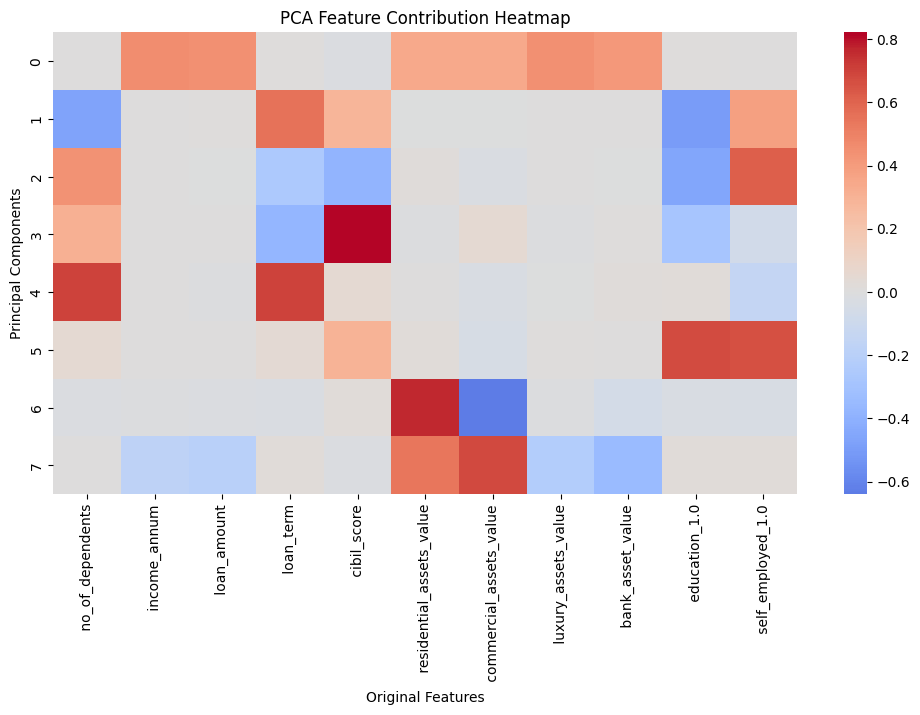

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(pca_components, cmap='coolwarm', center=0, annot=False)
plt.xlabel("Original Features")
plt.ylabel("Principal Components")
plt.title("PCA Feature Contribution Heatmap")
plt.show()


# **LOGISTIC REGRESSION**

In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Define hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [100, 200, 300]
}

In [134]:
# Initialize Logistic Regression model
log_reg = LogisticRegression()
# Perform Grid Search
log_Grid = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=3, verbose=0, n_jobs=-1, return_train_score=False)
log_Grid.fit(X_train_resampled, y_train_resampled)
best_log_params = log_Grid.best_params_

In [135]:
# Get best parameters and train final model
log_reg = LogisticRegression(**best_log_params)
log_reg.fit(X_train_resampled, y_train_resampled)

LogisticRegression(C=0.01)

In [136]:
# Predictions
y_pred_log = log_reg.predict(X_test)

In [137]:
log_reg.score(X_train_resampled, y_train_resampled)

0.9291764705882353

In [138]:
# Evaluation
accuracy_log = accuracy_score(y_test, y_pred_log)
accuracy_log

0.9379391100702577

In [139]:
f1_log = f1_score(y_test, y_pred_log)
f1_log

0.9486931268151017

In [140]:
# Print classification report
cm_log = confusion_matrix(y_test, y_pred_log)
print(classification_report(y_test, y_pred_log))


              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92       323
         1.0       0.98      0.92      0.95       531

    accuracy                           0.94       854
   macro avg       0.93      0.94      0.94       854
weighted avg       0.94      0.94      0.94       854



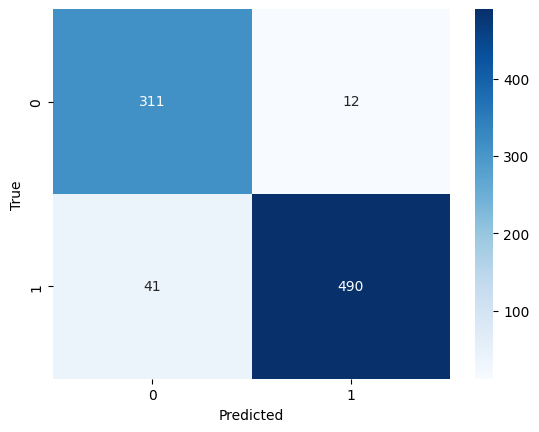

In [141]:
# Plot confusion matrix
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [142]:
# Print scores
print(f"Accuracy: {accuracy_log}")
print(f"F1 Score: {f1_log}")

Accuracy: 0.9379391100702577
F1 Score: 0.9486931268151017


# **SUPPORT VECTOR MACHINE (SVM)**

In [143]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Define hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

In [144]:
# Initialize SVM model
svm_model = SVC()

# Perform Grid Search
svm_Grid = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=3, verbose=0, n_jobs=-1, return_train_score=False)
svm_Grid.fit(X_train_resampled, y_train_resampled)
best_svm_params = svm_Grid.best_params_

In [145]:
# Get best parameters and train final model
svm_model = SVC(**best_svm_params)
svm_model.fit(X_train_resampled, y_train_resampled)

SVC(C=10)

In [146]:
# Predictions
y_pred_svm = svm_model.predict(X_test)

In [147]:
svm_model.score(X_train_resampled, y_train_resampled)

0.9670588235294117

In [148]:
# Evaluation
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_svm

0.9391100702576113

In [149]:
f1_svm = f1_score(y_test, y_pred_svm)
f1_svm

0.9507575757575758

In [150]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
# Print classification report
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92       323
         1.0       0.96      0.95      0.95       531

    accuracy                           0.94       854
   macro avg       0.93      0.94      0.94       854
weighted avg       0.94      0.94      0.94       854



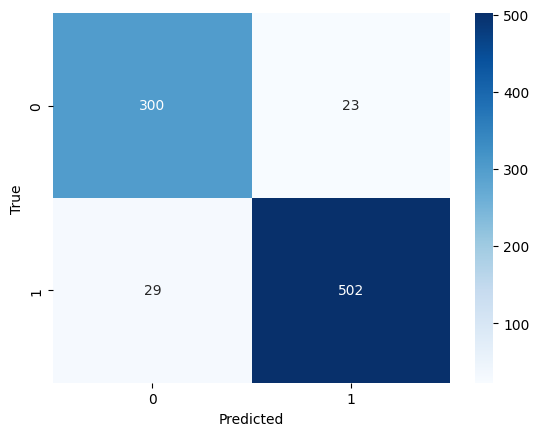

In [151]:
# Plot confusion matrix
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [152]:
# Print scores
print(f"Accuracy: {accuracy_svm}")
print(f"F1 Score: {f1_svm}")


Accuracy: 0.9391100702576113
F1 Score: 0.9507575757575758


# **K-NEAREST NEIGHBORS**

In [153]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Define hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

In [154]:
# Initialize KNN model
knn_model = KNeighborsClassifier()
# Perform Grid Search
knn_Grid = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=3, verbose=0, n_jobs=-1, return_train_score=False)
knn_Grid.fit(X_train_resampled, y_train_resampled)
best_knn_params = knn_Grid.best_params_

In [155]:
# Get best parameters and train final model
knn_model = KNeighborsClassifier(**best_knn_params)
knn_model.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier(metric='manhattan', weights='distance')

In [156]:
# Predictions
y_pred_knn = knn_model.predict(X_test)

In [157]:
knn_model.score(X_train_resampled, y_train_resampled)

1.0

In [158]:
# Evaluation
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_knn

0.9004683840749415

In [159]:
f1_knn = f1_score(y_test, y_pred_knn)
f1_knn

0.9178743961352657

In [160]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
# Print classification report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87       323
         1.0       0.94      0.89      0.92       531

    accuracy                           0.90       854
   macro avg       0.89      0.90      0.90       854
weighted avg       0.90      0.90      0.90       854



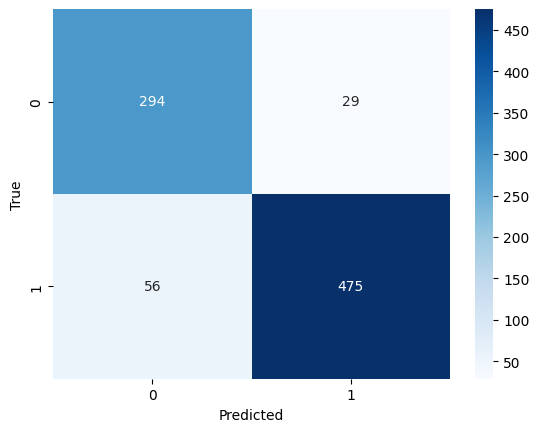

In [161]:
# Plot confusion matrix
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [162]:
# Print scores
print(f"Accuracy: {accuracy_knn}")
print(f"F1 Score: {f1_knn}")

Accuracy: 0.9004683840749415
F1 Score: 0.9178743961352657


# **DECISION TREE**

In [163]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [5, 10, 20, 30, 50, None],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 5, 10],  
    'criterion': ['gini', 'entropy'],  
    'splitter': ['best', 'random'],  
    'max_features': ['sqrt', 'log2', None]  
}


In [164]:
# Create decision tree object
dtree = DecisionTreeClassifier()
dt_Grid=GridSearchCV(estimator=dtree,param_grid=param_grid,cv=3,verbose=0,n_jobs=-1,return_train_score=False)
dt_Grid.fit(X_train_resampled,y_train_resampled)
dt_Grid.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'splitter': 'best'}

In [165]:
# Trainign the model using the training data
dtree=DecisionTreeClassifier(**dt_Grid.best_params_)
dtree.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=5)

In [166]:
dtree_pred = dtree.predict(X_test)

In [167]:
# Training Accuracy
dtree.score(X_train_resampled, y_train_resampled)

0.979764705882353

In [168]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score , f1_score
import sklearn.metrics as metrics
# Calculate accuracy
accuracy_dt = accuracy_score(y_test, dtree_pred)
accuracy_dt

0.9355971896955504

In [169]:
f1_dt=f1_score(dtree_pred,y_test)
f1_dt

0.9475691134413727

In [170]:
dtm = metrics.confusion_matrix(y_test, dtree_pred)
print(classification_report(y_test, dtree_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.93      0.92       323
         1.0       0.96      0.94      0.95       531

    accuracy                           0.94       854
   macro avg       0.93      0.94      0.93       854
weighted avg       0.94      0.94      0.94       854



Text(50.722222222222214, 0.5, 'True')

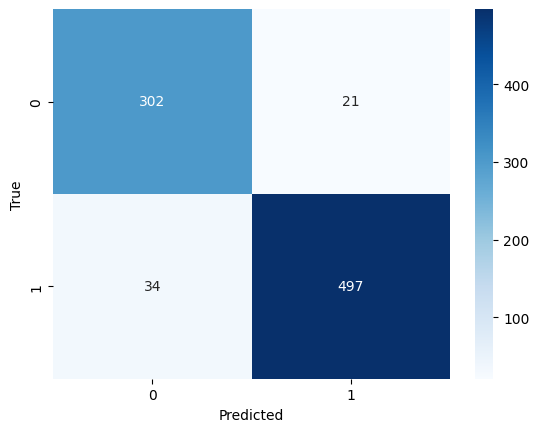

In [171]:
sns.heatmap(dtm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted') 
plt.ylabel('True')

# **RANDOM FOREST**

In [172]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None , 10, 20],
    'min_samples_split': [2,4,5],
    'min_samples_leaf': [1,2,4]
}

In [173]:
rfc=RandomForestClassifier()
rf_Grid=GridSearchCV(estimator=rfc,param_grid=param_grid,cv=3,verbose=0,n_jobs=-1,return_train_score=False)
rf_Grid.fit(X_train_resampled,y_train_resampled)
rf_Grid.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 100}

In [174]:
rf=RandomForestClassifier(**rf_Grid.best_params_)
rf.fit(X_train_resampled,y_train_resampled)

RandomForestClassifier(min_samples_split=4)

In [175]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score , f1_score
import sklearn.metrics as metrics
y_pred1=rf.predict(X_test)
accuracy_rf=accuracy_score(y_test,y_pred1)
accuracy_rf

0.955503512880562

In [176]:
f1_rf=f1_score(y_pred1,y_test)
f1_rf

0.9636711281070746

In [177]:
cm = metrics.confusion_matrix(y_test, y_pred1)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94       323
         1.0       0.98      0.95      0.96       531

    accuracy                           0.96       854
   macro avg       0.95      0.96      0.95       854
weighted avg       0.96      0.96      0.96       854



Text(50.722222222222214, 0.5, 'True')

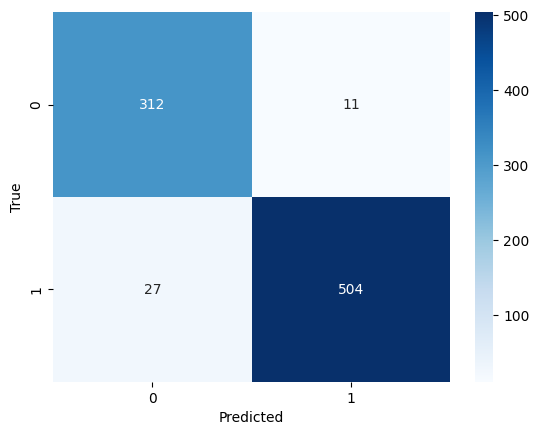

In [178]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

# **EXTREME GRADIENT BOOSTING (XGBOOST)**

In [179]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9]
}

In [180]:
# Initialize XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
# Perform Grid Search
xgb_Grid = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, verbose=0, n_jobs=-1, return_train_score=False)
xgb_Grid.fit(X_train_resampled, y_train_resampled)
best_xgb_params = xgb_Grid.best_params_

In [181]:
# Get best parameters and train final model
xgb_model = XGBClassifier(**best_xgb_params, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=9,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

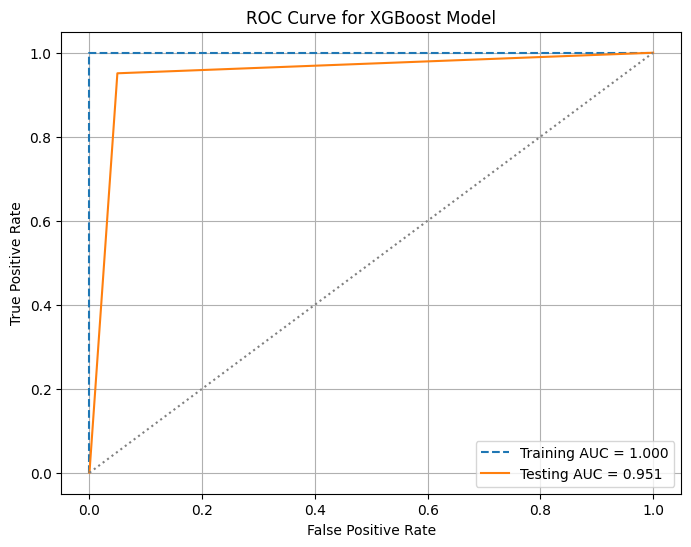

In [182]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
# Predict probabilities
y_train_probs = xgb_model.predict(X_train_resampled)
y_test_probs = xgb_model.predict(X_test)

# Compute ROC curve and AUC score
fpr_train, tpr_train, _ = roc_curve(y_train_resampled, y_train_probs)
auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, _ = roc_curve(y_test, y_test_probs)
auc_test = auc(fpr_test, tpr_test)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Training AUC = {auc_train:.3f}', linestyle='--')
plt.plot(fpr_test, tpr_test, label=f'Testing AUC = {auc_test:.3f}', linestyle='-')
plt.plot([0, 1], [0, 1], color='grey', linestyle=':')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost Model')
plt.legend()
plt.grid()
plt.show()

In [183]:
# Predictions
y_pred_xgb = xgb_model.predict(X_test)

In [184]:
xgb_model.score(X_train_resampled, y_train_resampled)

1.0

In [185]:
# Evaluation
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
accuracy_xgb

0.9508196721311475

In [186]:
f1_xgb = f1_score(y_test, y_pred_xgb)
f1_xgb

0.9600760456273765

In [187]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
# Print classification report
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

         0.0       0.92      0.95      0.94       323
         1.0       0.97      0.95      0.96       531

    accuracy                           0.95       854
   macro avg       0.95      0.95      0.95       854
weighted avg       0.95      0.95      0.95       854



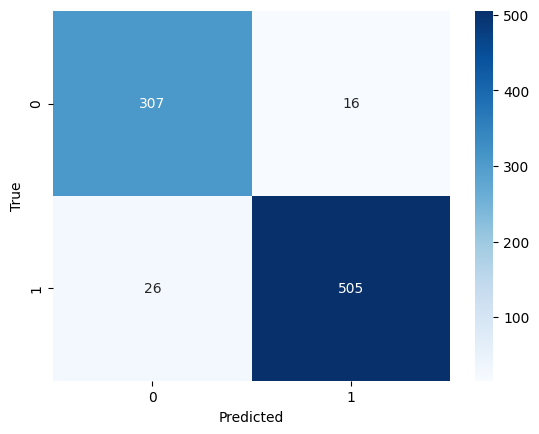

In [188]:
# Plot confusion matrix
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [189]:
# Print scores
print(f"Accuracy: {accuracy_xgb}")
print(f"F1 Score: {f1_xgb}")

Accuracy: 0.9508196721311475
F1 Score: 0.9600760456273765


# **ANN**

In [190]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential # type: ignore
from tensorflow.keras.layers import Dense,Dropout # type: ignore
import kerastuner as kt
from keras.callbacks import ModelCheckpoint, EarlyStopping # type: ignore
import numpy as np

In [191]:
def build_model(hp):
    model = Sequential()

    # First layer: Input layer
    model.add(Dense(hp.Int('units_0', min_value=8, max_value=40, step=4),activation=hp.Choice('activation_0', values=['relu', 'tanh', 'sigmoid']),input_dim=8))  # Ensure input_dim is correct for your dataset
    model.add(Dropout(hp.Choice('drp_0', values=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))

    # Additional layers
    for i in range(1, hp.Int('num_layers', min_value=1, max_value=10)):  # Start from layer 1
        model.add(Dense(hp.Int(f'units_{i}', min_value=8, max_value=40, step=4),activation=hp.Choice(f'activation_{i}', values=['relu', 'tanh', 'sigmoid'])))
        model.add(Dropout(hp.Choice(f'drp_{i}', values=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))  # For binary classification

    # Compile the model with hyperparameter optimization
    model.compile(optimizer=hp.Choice('optimizer', values=['rmsprop', 'adam', 'sgd', 'nadam']),loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [192]:
# Ensure the target variable is 1D (flatten if necessary)
y_train_resampled = np.ravel(y_train_resampled)  # This ensures it is 1D

In [193]:
tuner=kt.RandomSearch(build_model,objective='val_accuracy',max_trials=200)

Reloading Tuner from .\untitled_project\tuner0.json


In [194]:
tuner.search(X_train_resampled,y_train_resampled,epochs=10,validation_data=(X_test,y_test))
tuner.get_best_hyperparameters()[0].values

{'units_0': 40,
 'activation_0': 'tanh',
 'drp_0': 0.4,
 'num_layers': 5,
 'optimizer': 'adam',
 'units_1': 36,
 'activation_1': 'sigmoid',
 'drp_1': 0.2,
 'units_2': 28,
 'activation_2': 'tanh',
 'drp_2': 0.3,
 'units_3': 24,
 'activation_3': 'sigmoid',
 'drp_3': 0.2,
 'units_4': 16,
 'activation_4': 'tanh',
 'drp_4': 0.2,
 'units_5': 20,
 'activation_5': 'sigmoid',
 'drp_5': 0.1,
 'units_6': 12,
 'activation_6': 'sigmoid',
 'drp_6': 0.5,
 'units_7': 12,
 'activation_7': 'tanh',
 'drp_7': 0.4,
 'units_8': 20,
 'activation_8': 'tanh',
 'drp_8': 0.8,
 'units_9': 36,
 'activation_9': 'tanh',
 'drp_9': 0.1}

In [195]:
model=tuner.get_best_models(num_models=1)[0]
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 40)             │           360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 40)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 36)             │         1,476 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 36)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 28)             │         1,036 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 28)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 24)             │           696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,985 (15.57 KB)

 Trainable params: 3,985 (15.57 KB)

 Non-trainable params: 0 (0.00 B)

In [196]:
callback=EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=10,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=True)

In [197]:
history = model.fit(X_train_resampled,y_train_resampled,epochs=200,initial_epoch=5,validation_data=(X_test,y_test),callbacks=callback)

Epoch 6/200
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9290 - loss: 0.2243 - val_accuracy: 0.9496 - val_loss: 0.1586
Epoch 7/200
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9285 - loss: 0.2215 - val_accuracy: 0.9496 - val_loss: 0.1569
Epoch 8/200
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9373 - loss: 0.2083 - val_accuracy: 0.9485 - val_loss: 0.1560
Epoch 9/200
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9261 - loss: 0.2358 - val_accuracy: 0.9508 - val_loss: 0.1587
Epoch 10/200
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9418 - loss: 0.1972 - val_accuracy: 0.9543 - val_loss: 0.1520
Epoch 11/200
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9375 - loss: 0.2091 - val_accuracy: 0.9602 - val_loss: 0.1481
Epoch 12/200
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9470 - loss: 0.1794 - val_accuracy: 0.9508 - val_loss: 0.1585
Epoch 13/200
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9319 - loss: 0.2196 - val_

In [198]:
y_rec = model.predict(X_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [199]:
y_pred = np.where(y_rec>=0.5,1,0)

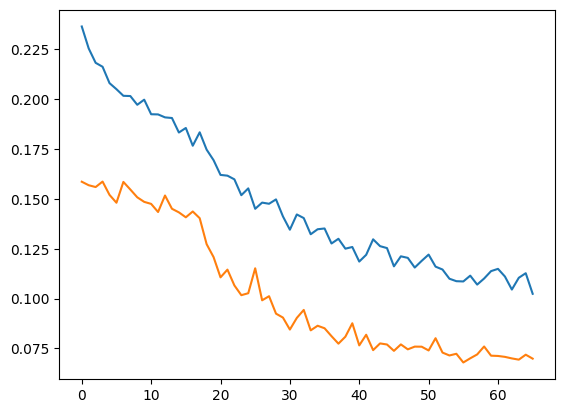

In [200]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')

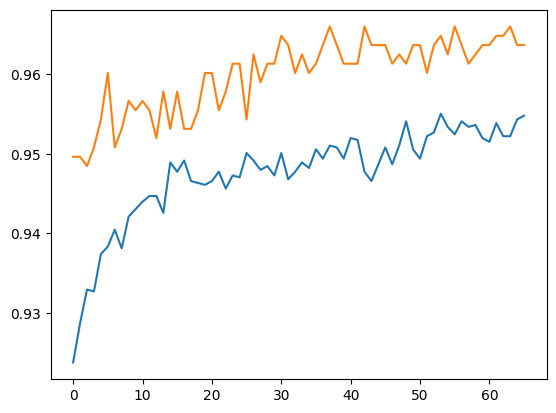

In [201]:
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test')

In [202]:
from sklearn.metrics import accuracy_score
accuracy_ann=accuracy_score(y_test,y_pred)
accuracy_ann

0.9660421545667447

In [203]:
f1_ann=f1_score(y_pred,y_test)
f1_ann

0.9721421709894332

In [204]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96       323
         1.0       0.99      0.95      0.97       531

    accuracy                           0.97       854
   macro avg       0.96      0.97      0.96       854
weighted avg       0.97      0.97      0.97       854



Text(50.722222222222214, 0.5, 'True')

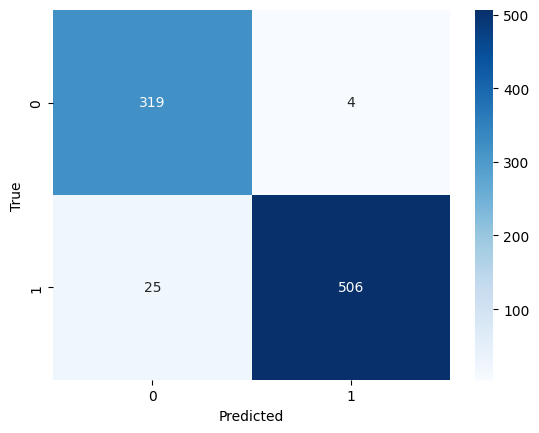

In [205]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

In [206]:
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler
import shap

# Save ANN model
with open('ann_model.pkl', 'wb') as ann_file:
    ann_model =  pickle.dump(model, ann_file)
# Save Scaler
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)
# Save PCA
with open('pca.pkl', 'wb') as pca_file:
    pickle.dump(pca, pca_file)
    
# Assume these are your actual accuracy scores after training
model_accuracies = {
    "Decision Tree": f"{accuracy_dt:.2%}",   # Convert to percentage
    "Random Forest": f"{accuracy_rf:.2%}",
    "ANN": f"{accuracy_ann:.2%}"
}
# Save the accuracy dictionary as a pickle file
with open("model_accuracies.pkl", "wb") as file:
    pickle.dump(model_accuracies, file)


In [207]:
print('ACCURACY')
print('Accuracy of DT is',accuracy_dt)
print('Accuracy of RF is',accuracy_rf)
print('Accuracy of ANN is',accuracy_ann)
print('Accuracy of LR is',accuracy_log)
print('Accuracy of SVM is',accuracy_svm)
print('Accuracy of KNN is',accuracy_knn)
print('Accuracy of XGB is',accuracy_xgb)

ACCURACY
Accuracy of DT is 0.9355971896955504
Accuracy of RF is 0.955503512880562
Accuracy of ANN is 0.9660421545667447
Accuracy of LR is 0.9379391100702577
Accuracy of SVM is 0.9391100702576113
Accuracy of KNN is 0.9004683840749415
Accuracy of XGB is 0.9508196721311475


In [208]:
print('F1 SCORE')
print('F1 SCORE of DT is',f1_dt)
print('F1 SCORE of RF is',f1_rf)
print('F1 SCORE of ANN is',f1_ann)
print('F1 SCORE of LR is',f1_log)
print('F1 SCORE of SVM is',f1_svm)
print('F1 SCORE of KNN is',f1_knn)
print('F1 SCORE of XGB is',f1_xgb)

F1 SCORE
F1 SCORE of DT is 0.9475691134413727
F1 SCORE of RF is 0.9636711281070746
F1 SCORE of ANN is 0.9721421709894332
F1 SCORE of LR is 0.9486931268151017
F1 SCORE of SVM is 0.9507575757575758
F1 SCORE of KNN is 0.9178743961352657
F1 SCORE of XGB is 0.9600760456273765


# **CONCLUSIONS**
This study used a structured dataset to test several machine learning models for predicting loan acceptance. Data preparation approaches such categorical encoding, feature scaling, and oversampling were used to improve model performance. Seven classification models were tested, including classic statistical methods (Logistic Regression), advanced ensemble techniques (Random Forest and XGBoost), and deep learning (Artificial Neural Networks).

Among the models examined, Artificial Neural Networks (ANN) performed the best overall, with the greatest F1 Score and Accuracy, demonstrating its capacity to capture complicated data patterns. Random Forest and XGBoost both performed admirably, demonstrating the power of ensemble learning in enhancing the precision of predictions. Decision Trees and Support Vector Machines produced competitive results, although Logistic Regression gave a reliable baseline. K-Nearest Neighbors (KNN) showed the lowest accuracy, indicating a sensitivity to data distribution and feature scaling.

While ensemble approaches and deep learning models performed excellently, additional feature engineering, hyperparameter tuning, and testing on larger datasets could deliver even better results. Future study should address potential model biases and improve accessibility for real-world financial applications.

To summarize, machine learning models, particularly ensemble and deep learning, provide a powerful and efficient solution for automating loan approval processes. However, additional validation with real-world data and regulatory compliance are required before widespread deployment in financial institutions. 

